In [ ]:
Task1:There have been quite a few Pokémon introduced over the series' 
    history. How many were introduced in each generation? Create a bar chart of these frequencies 
    using the 'generation_id' column.

(807, 14)


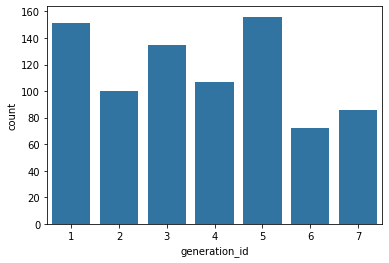

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

pokemon = pd.read_csv(r'C:\Users\venxr\Udacity_exercises\AIPND-master\Matplotlib\data\pokemon.csv')
print(pokemon.shape)
base_color = sb.color_palette()[0]
sb.countplot(data = pokemon, x= 'generation_id', color = base_color)


### **Task 2**: Each Pokémon species has one or two 'types' that play a part in its offensive and defensive capabilities. How frequent is each type? The code below creates a new dataframe that puts all of  the type counts in a single column.

Text(0.5, 0, 'proportion')

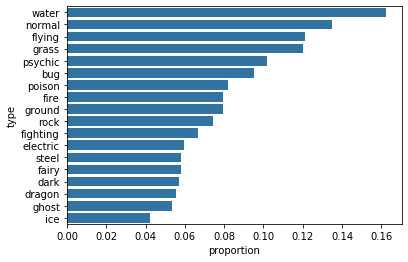

In [3]:
pkmn_types = pokemon.melt(id_vars = ['id','species'], 
                          value_vars = ['type_1', 'type_2'], 
                          var_name = 'type_level', value_name = 'type').dropna()

 # get order of bars by frequency
type_counts = pkmn_types['type'].value_counts()
type_order = type_counts.index

    # compute largest proportion
n_pokemon = pkmn_types['species'].unique().shape[0]
max_type_count = type_counts[0]
max_prop = max_type_count / n_pokemon

    # establish tick locations and create plot
base_color = sb.color_palette()[0]
tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

base_color = sb.color_palette()[0]
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order)
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('proportion')


In [4]:
#Histogram practice

### Task: Pokémon have a number of different statistics that describe their combat capabilities. Here, create a histogram that depicts the distribution of 'special-defense' values taken. Hint: Try playing around with different bin width sizes to see what best depicts the data.

(array([ 6., 12., 29., 28., 49., 53., 66., 59., 63., 53., 57., 51., 52.,
        42., 37., 34., 29., 18., 14., 11., 10.,  4., 12.,  4.,  3.,  0.,
         9.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  1.]),
 array([ 20,  25,  30,  35,  40,  45,  50,  55,  60,  65,  70,  75,  80,
         85,  90,  95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145,
        150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210,
        215, 220, 225, 230], dtype=int64),
 <a list of 42 Patch objects>)

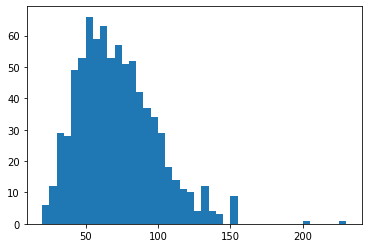

In [5]:
bins = np.arange(20, pokemon['special-defense'].max()+5, 5)
plt.hist(pokemon['special-defense'], bins = bins)

### **Task 1**: There are also variables in the dataset that don't have anything to do with the game mechanics, and are just there for flavor. Try plotting the distribution of Pokémon heights (given in meters). For this exercise, experiment with different axis limits as well as bin widths to see what gives the clearest view of the data.

(0, 6)

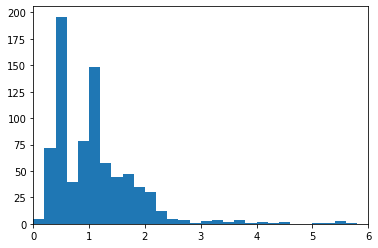

In [8]:
bins = np.arange(0, pokemon['height'].max()+0.2, 0.2)
plt.hist(data = pokemon, x = 'height', bins = bins)
plt.xlim((0,6))


### Task 2: In this task, you should plot the distribution of Pokémon weights (given in kilograms). Due to the very large range of values taken, you will probably want to perform an axis transformation as part of your visualization workflow.

Text(0.5, 0, 'Weight (kg)')

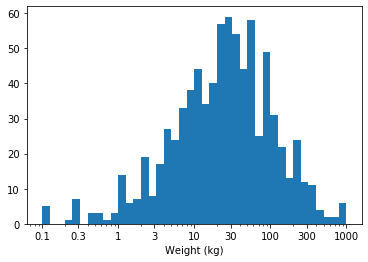

In [9]:
bins = 10 ** np.arange(-1, 3.0+0.1, 0.1)
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(val) for val in ticks]

plt.hist(data = pokemon, x = 'weight', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Weight (kg)')